# importing Necessary Libraries

Act as Time Series forecasting expert and you have 10+ years of experience in predictiong GPD growth of non-oil gdp.
I have a dataset which I have attached to in this prompt.

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn import metrics

# Step 1 Loading the Cleaned Dataset into dataframe

In [2]:
import pandas as pd
# Load the dataset
dataframe = pd.read_csv('Petrol CSV w Date.csv')
# Convert 'Date' column to DatetimeIndex with the correct format
dataframe.index = pd.to_datetime(dataframe['date'], format='%Y')
# Now you can work with the DataFrame as needed
print(dataframe.head())

            date  PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date                                                                        
1980-01-01  1980                                           542254.0         
1981-01-01  1981                                           589017.0         
1982-01-01  1982                                           644907.0         
1983-01-01  1983                                           690214.0         
1984-01-01  1984                                           754725.0         


In [3]:
df1 = dataframe.copy()
del df1['date']
df1

,PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date,
1980-01-01,542254.000
1981-01-01,589017.000
1982-01-01,644907.000
1983-01-01,690214.000
1984-01-01,754725.000
1985-01-01,783807.000
1986-01-01,822735.000
1987-01-01,874255.000
1988-01-01,940358.000


In [4]:
df = df1[:44]
df

,PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date,
1980-01-01,542254.000
1981-01-01,589017.000
1982-01-01,644907.000
1983-01-01,690214.000
1984-01-01,754725.000
1985-01-01,783807.000
1986-01-01,822735.000
1987-01-01,874255.000
1988-01-01,940358.000


In [5]:
split_date = '2015-01-01'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()

In [6]:
len(train)

36

In [7]:
len(test)

8

In [8]:
df.shape

(44, 1)

In [9]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Use isocalendar for week numbers

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X  # Unindented to match the if label: block

# Create features and labels for training data
X_train, y_train = create_features(train, label='PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit')

# Create features and labels for test data
X_test, y_test = create_features(test, label='PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit')

In [10]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Define a parameter grid for hyperparameter tuning
param_grid = {
 'max_depth': [3, 4, 5, 6],
 'learning_rate': [0.01, 0.02, 0.03],
 'n_estimators': [150, 200, 250],
 'colsample_bytree': [0.5, 0.7, 0.9]
}
# Create an XGBoost regressor with 'reg:squarederror' as the objective
xgb = XGBRegressor(objective='reg:squarederror')
# Create a GridSearchCV object with custom scoring functions
scoring = {
 'MSE': 'neg_mean_squared_error',
 'MAE': 'neg_mean_absolute_error',
 'MAPE': 'neg_mean_absolute_percentage_error',
 'RMSE': 'neg_root_mean_squared_error'
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scoring, cv=4, refit='MSE', verbose=1)
# Fit the grid search to your data
grid_search.fit(X_train, y_train)
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
# Create a new XGBoost model with the best hyperparameters
best_xgb = XGBRegressor(objective='reg:squarederror', **best_params)
# Fit the model with early stopping
best_xgb.fit(X_train, y_train,
 eval_set=[(X_train, y_train), (X_test, y_test)],
 verbose=False)
# Evaluate the model on the test data
y_pred = best_xgb.predict(X_test)
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mpe = ((y_test - y_pred) / y_test).mean() * 100
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Percentage Error (MPE):", mpe)
print("Root Mean Squared Error (RMSE):", rmse)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 250}
Mean Squared Error (MSE): 12750517653943.646
Mean Absolute Error (MAE): 3441772.48225
Mean Absolute Percentage Error (MAPE): 44.602493511766006
Mean Percentage Error (MPE): 44.602493511766006
Root Mean Squared Error (RMSE): 3570786.6995864715


c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
from xgboost import XGBRegressor
import numpy as np
xgb = XGBRegressor(objective='reg:linear', max_depth=3, learning_rate=0.03, n_estimators=250, colsample_bytree=0.9,  early_stopping_rounds=100,)
xgb
xgb.fit(X_train, y_train,
 eval_set=[(X_train, y_train), (X_test, y_test)],
 verbose=False)

c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Text(0.5, 1.0, 'Feature Importance (For PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit)')

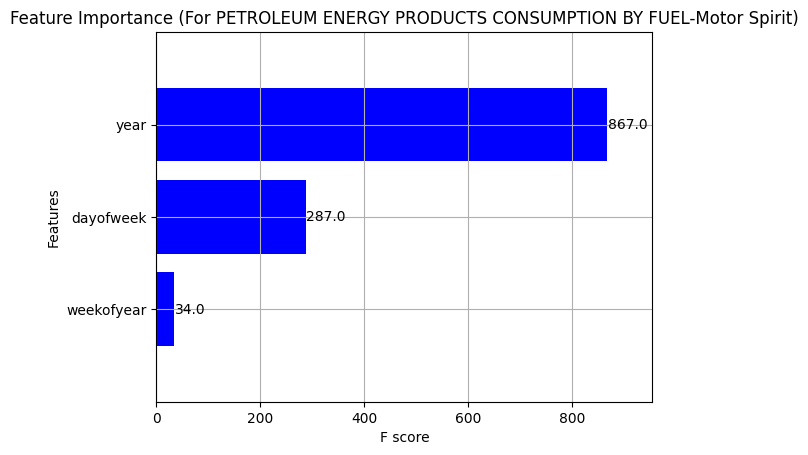

In [12]:
plot_importance(xgb, height=0.8, color='blue');
plt.title("Feature Importance (For PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit)")

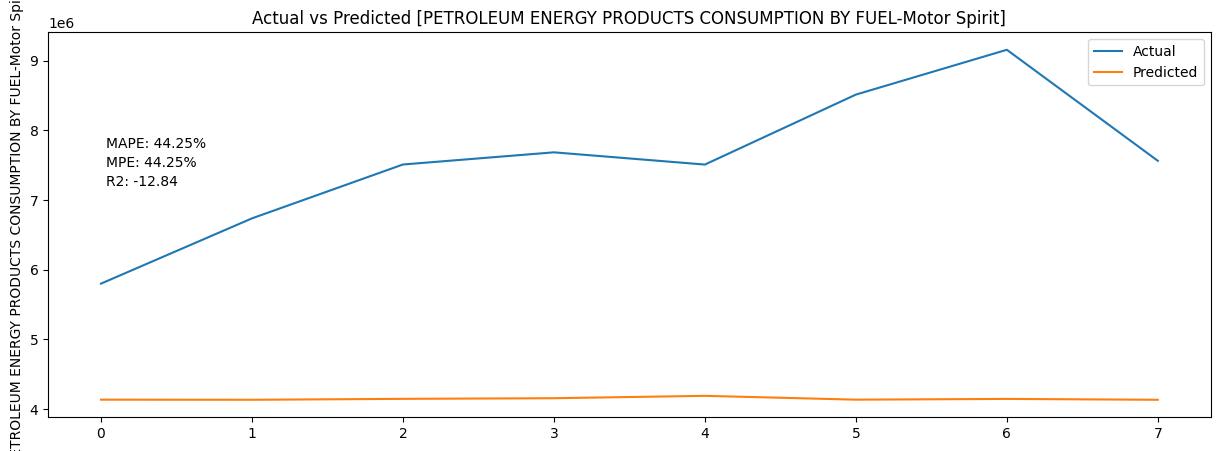

In [13]:
# Predictions
predicted_results = xgb.predict(X_test)
# Calculate error metrics
mse = metrics.mean_squared_error(y_test, predicted_results)
mae = metrics.mean_absolute_error(y_test, predicted_results)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted_results))
# Calculate mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, predicted_results)
# Calculate mean percentage error (MPE)
mpe = ((y_test - predicted_results) / y_test).mean() * 100
# Calculate R-squared (R2) score
r2 = metrics.r2_score(y_test, predicted_results)
# Plotting graph for test and Predicted
plt.figure(figsize=(15, 5))
plt.plot(list(y_test), label='Actual')
plt.plot(list(predicted_results), label='Predicted')
plt.title("Actual vs Predicted [PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit]")
plt.ylabel("PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit")
plt.legend()
# Add error metrics as text annotations on the plot
plt.annotate(f'MAPE: {mape:.2f}%', xy=(0.05, 0.70), xycoords='axes fraction')
plt.annotate(f'MPE: {mpe:.2f}%', xy=(0.05, 0.65), xycoords='axes fraction')
plt.annotate(f'R2: {r2:.2f}', xy=(0.05, 0.60), xycoords='axes fraction')
plt.show()

C:\Users\MoaviaHassan\AppData\Local\Temp\ipykernel_7948\2168948008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
C:\Users\MoaviaHassan\AppData\Local\Temp\ipykernel_7948\2168948008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\MoaviaHassan\AppData\Local\Temp\ipykernel_7948\2168948008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

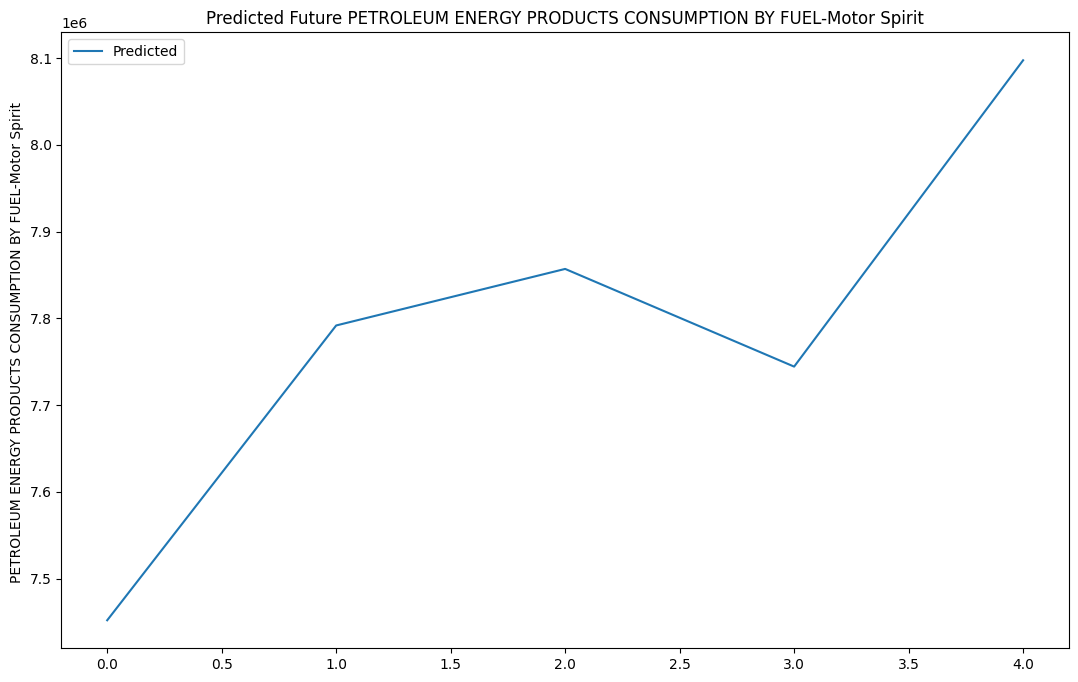

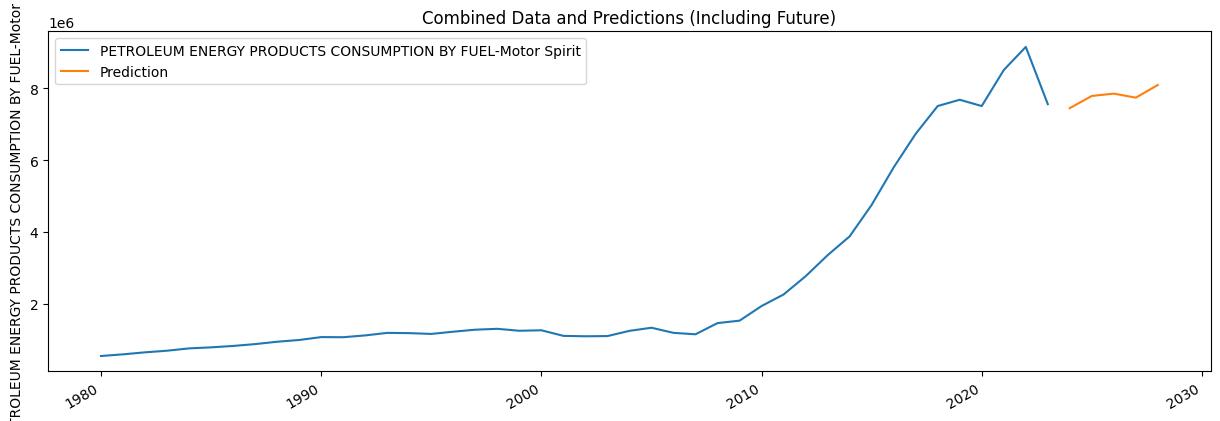

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
# Create features from datetime index
def create_features(df):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Use isocalendar for week numbers

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X
# Define your training data
X_train = create_features(df)
y_train = df['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit']
# Define your XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', max_depth=4, learning_rate=0.03, n_estimators=250, colsample_bytree=0.7)
# Train your XGBoost model
xgb_model.fit(X_train, y_train)
# Create features for future dates (adjust this as needed)
future_dates = pd.date_range(start=df.index[-1], periods=5, freq='Y') # Assuming you want to forecast 15 years into the future
df_future_dates = pd.DataFrame(index=future_dates)
X_test_future = create_features(df_future_dates)
# Predict future results
predicted_results_future = xgb_model.predict(X_test_future)
# Plot the predicted results
plt.figure(figsize=(13, 8))
plt.plot(predicted_results_future)
plt.title("Predicted Future PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit")
plt.ylabel("PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit ")
plt.legend(('Predicted',))
plt.show()
# Add the predicted results to your future dates DataFrame copy
df_future_dates_copy = df_future_dates.copy()
df_future_dates_copy['Prediction'] = predicted_results_future
# Concatenate the predicted results with your original data
Irr_all_future = pd.concat([df, df_future_dates_copy], sort=False)
# Plot the combined data and predictions
Overview_Complete_Data_And_Prediction_future = Irr_all_future[['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit', 'Prediction']].plot(figsize=(15, 5))
plt.title("Combined Data and Predictions (Including Future)")
plt.ylabel("PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit")
plt.show()

In [15]:
predicted_results_future

array([7451980.5, 7791831.5, 7857016. , 7744409. , 8097539. ],
      dtype=float32)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a Pandas Series 'f1' from your previous calculations
f1 = predicted_results_future


# Reshape 'f1_array' to a 2D array with one column
f1 = f1.reshape(-1, 1)
f1

array([[7451980.5],
       [7791831.5],
       [7857016. ],
       [7744409. ],
       [8097539. ]], dtype=float32)

In [17]:
import pandas as pd
import numpy as np

# Assuming you have the 'forecasted_values_first' array
forecasted_values_first = np.array([[7451980.5],
       [7791831.5],
       [7857016. ],
       [7744409. ],
       [8097539. ]], dtype=float)
# Create a DataFrame with the 'Projected Yearly Demand' column
data = pd.DataFrame({'Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit': forecasted_values_first.ravel()})

# Print the first few rows of the new dataset
print(data.head(15))

   Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
0                                          7451980.5                   
1                                          7791831.5                   
2                                          7857016.0                   
3                                          7744409.0                   
4                                          8097539.0                   


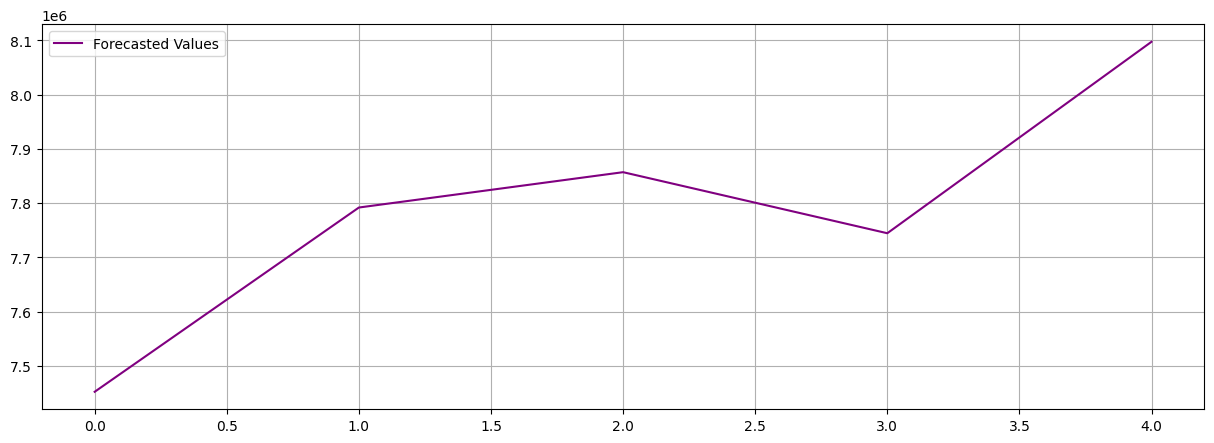

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Plot only forecasted values
plt.figure(figsize=(15, 5))
plt.plot(f1, label='Forecasted Values', linestyle='-', color='purple')

# Add gridlines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [19]:
f2 = df1[39:44]

# Add 'Forecasted_Values' column to 'f2' and populate it with forecasted values
f2['Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'] = data['Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'].values
f2

C:\Users\MoaviaHassan\AppData\Local\Temp\ipykernel_7948\915417842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'] = data['Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'].values


,PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit,Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date,,
2019-01-01,7685985.000,7451980.5
2020-01-01,7510363.858,7791831.5
2021-01-01,8515259.000,7857016.0
2022-01-01,9158934.000,7744409.0
2023-01-01,7564345.000,8097539.0


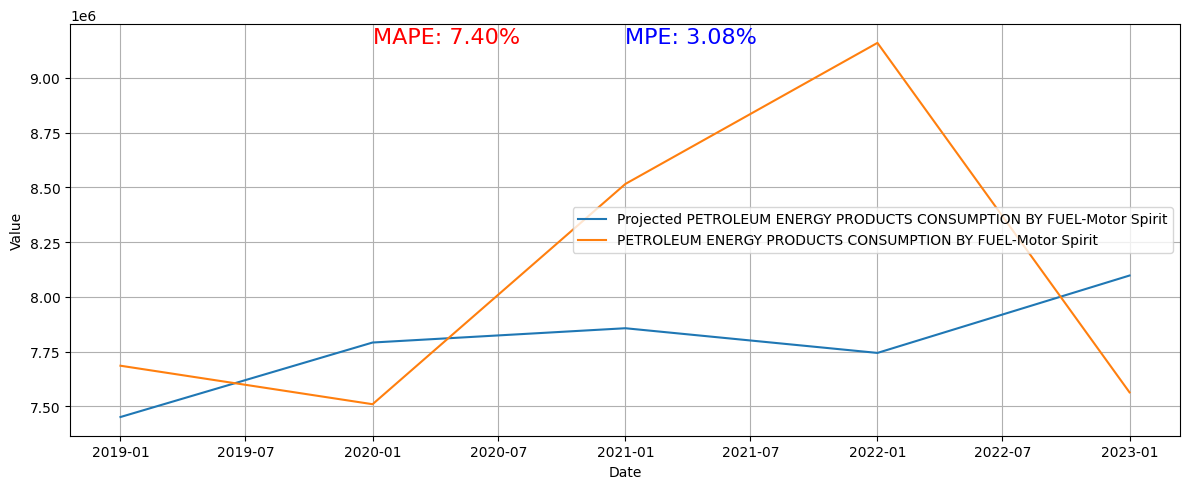

In [20]:
import matplotlib.pyplot as plt

# Assuming 'f2' is a DataFrame containing 'Forecasted_Values' and 'Demand' columns

# Calculate MAPE and MPE
mape = ((f2['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'] - f2['Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit']) / f2['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit']).abs().mean() * 100
mpe = ((f2['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'] - f2['Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit']) / f2['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit']).mean() * 100

# Plot the 'Forecasted_Values' and 'Demand' series
plt.figure(figsize=(12, 5))
plt.plot(f2.index, f2['Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'], label='Projected PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit', linestyle='-')
plt.plot(f2.index, f2['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'], label='PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit', linestyle='-')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Add MAPE and MPE as text annotations with adjusted positions
mape_x = f2.index[1]  # Adjust the x-coordinate for MAPE
mape_y = f2['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'].max() - 3  # Adjust the y-coordinate for MAPE
plt.text(mape_x, mape_y, f'MAPE: {mape:.2f}%', fontsize=16, color='red')

mpe_x = f2.index[2]  # Adjust the x-coordinate for MPE
mpe_y = f2['PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit'].max() - 1  # Adjust the y-coordinate for MPE
plt.text(mpe_x, mpe_y, f'MPE: {mpe:.2f}%', fontsize=16, color='blue')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Forecast 1 Now Available in CSV

In [21]:
# Step 1: Create a list of forecasted years from 2024 to 2028
forecast_years = [2024, 2025, 2026, 2027, 2028]

# Step 2: Prepare the forecasted consumption values



forecasted_values = predicted_results_future.tolist()

# Step 3: Combine years and forecasted values
# Step 3: Combine years and forecasted values
forecast_data = list(zip(forecast_years, forecasted_values))

# Step 4: Create forecast dataframe
forecast_df = pd.DataFrame(
    forecast_data,
    columns=['date', 'PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit']
)

# Step 5: Read the original CSV file into a dataframe
original_df = pd.read_csv('Petrol CSV w Date.csv')

# Step 6: Ensure 'date' column types match
if original_df['date'].dtype == 'int64':
    forecast_df['date'] = forecast_df['date'].astype(int)
else:
    forecast_df['date'] = forecast_df['date'].astype(str)

# Step 7: Append forecasted data using pd.concat()
combined_df = pd.concat([original_df, forecast_df], ignore_index=True)

# Step 8: Save to CSV
combined_df.to_csv('Petrol CSV Forecast1.csv', index=False)

## Repating Upper Cells for Forecast for 5 YEars

In [23]:
import pandas as pd
# Load the dataset
dataframe = pd.read_csv('Petrol CSV Forecast1.csv')
# Convert 'Date' column to DatetimeIndex with the correct format
dataframe.index = pd.to_datetime(dataframe['date'], format='%Y')
# Now you can work with the DataFrame as needed
print(dataframe.tail())

            date  PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date                                                                        
2024-01-01  2024                                          7451980.5         
2025-01-01  2025                                          7791831.5         
2026-01-01  2026                                          7857016.0         
2027-01-01  2027                                          7744409.0         
2028-01-01  2028                                          8097539.0         


In [24]:
df1 = dataframe.copy()
del df1['date']
df1

,PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date,
1980-01-01,542254.000
1981-01-01,589017.000
1982-01-01,644907.000
1983-01-01,690214.000
1984-01-01,754725.000
1985-01-01,783807.000
1986-01-01,822735.000
1987-01-01,874255.000
1988-01-01,940358.000


In [25]:
df = df1[:49]
df

,PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date,
1980-01-01,542254.000
1981-01-01,589017.000
1982-01-01,644907.000
1983-01-01,690214.000
1984-01-01,754725.000
1985-01-01,783807.000
1986-01-01,822735.000
1987-01-01,874255.000
1988-01-01,940358.000


In [32]:
split_date = '2019-01-01'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()

In [33]:
train

,PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date,
1980-01-01,542254.0
1981-01-01,589017.0
1982-01-01,644907.0
1983-01-01,690214.0
1984-01-01,754725.0
1985-01-01,783807.0
1986-01-01,822735.0
1987-01-01,874255.0
1988-01-01,940358.0


In [34]:
test

,PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit
date,
2020-01-01,7510363.858
2021-01-01,8515259.000
2022-01-01,9158934.000
2023-01-01,7564345.000
2024-01-01,7451980.500
2025-01-01,7791831.500
2026-01-01,7857016.000
2027-01-01,7744409.000
2028-01-01,8097539.000


In [35]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Use isocalendar for week numbers

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X  # Unindented to match the if label: block

# Create features and labels for training data
X_train, y_train = create_features(train, label='PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit')

# Create features and labels for test data
X_test, y_test = create_features(test, label='PETROLEUM ENERGY PRODUCTS CONSUMPTION BY FUEL-Motor Spirit')

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Define a parameter grid for hyperparameter tuning
param_grid = {
 'max_depth': [3, 4, 5, 6],
 'learning_rate': [0.01, 0.02, 0.03],
 'n_estimators': [150, 200, 250],
 'colsample_bytree': [0.5, 0.7, 0.9]
}
# Create an XGBoost regressor with 'reg:squarederror' as the objective
xgb = XGBRegressor(objective='reg:squarederror')
# Create a GridSearchCV object with custom scoring functions
scoring = {
 'MSE': 'neg_mean_squared_error',
 'MAE': 'neg_mean_absolute_error',
 'MAPE': 'neg_mean_absolute_percentage_error',
 'RMSE': 'neg_root_mean_squared_error'
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scoring, cv=4, refit='MSE', verbose=1)
# Fit the grid search to your data
grid_search.fit(X_train, y_train)
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
# Create a new XGBoost model with the best hyperparameters
best_xgb = XGBRegressor(objective='reg:squarederror', **best_params)
# Fit the model with early stopping
best_xgb.fit(X_train, y_train,
 eval_set=[(X_train, y_train), (X_test, y_test)],
 verbose=False)
# Evaluate the model on the test data
y_pred = best_xgb.predict(X_test)
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mpe = ((y_test - y_pred) / y_test).mean() * 100
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Percentage Error (MPE):", mpe)
print("Root Mean Squared Error (RMSE):", rmse)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 250}
Mean Squared Error (MSE): 1484879857805.482
Mean Absolute Error (MAE): 1059142.1508888889
Mean Absolute Percentage Error (MAPE): 12.895739161687953
Mean Percentage Error (MPE): 12.578081623832373
Root Mean Squared Error (RMSE): 1218556.464758807


c:\Users\MoaviaHassan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
